In [124]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [125]:
df = pd.read_csv('creditcard.csv')

In [126]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [127]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
53165,45844.0,1.277,-1.712,-1.037,-2.398,0.675,3.398,-1.460,0.782,-1.900,...,-0.333,-1.086,0.015,0.955,0.240,-0.410,0.018,0.049,158.65,0
6436,7638.0,0.869,-1.025,2.053,0.909,-1.884,0.682,-1.423,0.369,3.083,...,0.010,0.510,-0.168,0.616,0.166,1.172,-0.032,0.025,119.43,0
7498,10231.0,-1.928,1.785,-0.123,-0.253,0.763,0.538,0.426,-2.382,0.731,...,2.151,-0.920,-0.283,-1.143,0.404,-0.508,-0.293,-0.246,89.86,0
273269,165517.0,-0.541,1.539,-0.625,-0.883,0.510,-2.225,1.606,-0.359,-0.389,...,0.276,1.159,-0.119,0.938,-0.373,0.013,0.221,0.053,0.77,0
210901,138175.0,1.828,-0.534,-1.880,0.376,0.186,-0.795,0.461,-0.234,0.317,...,0.059,0.026,-0.060,-0.362,0.091,0.558,-0.129,-0.073,124.99,0


In [128]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [129]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


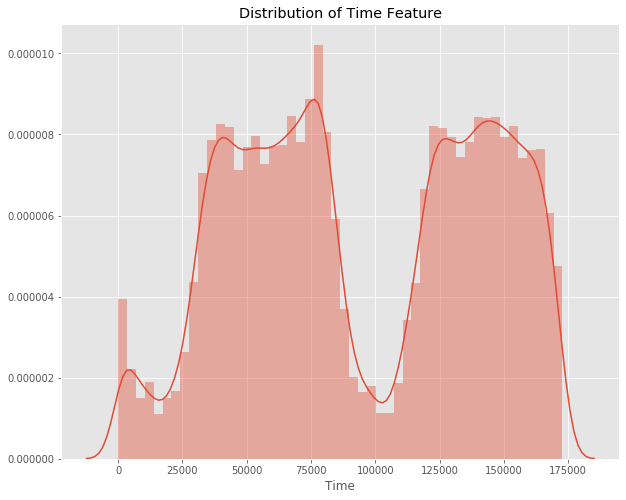

In [130]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

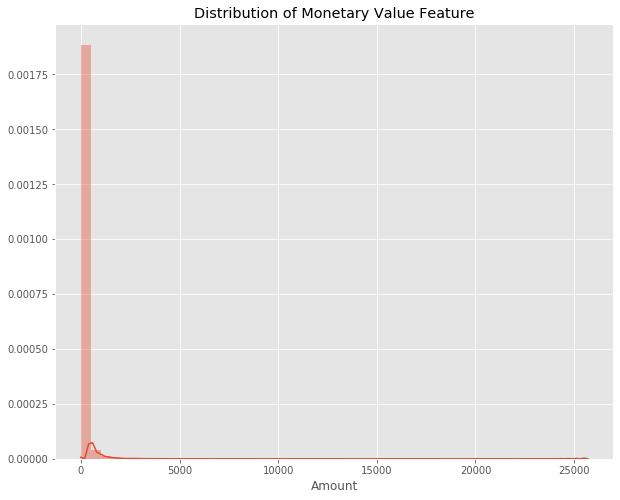

In [131]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [132]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

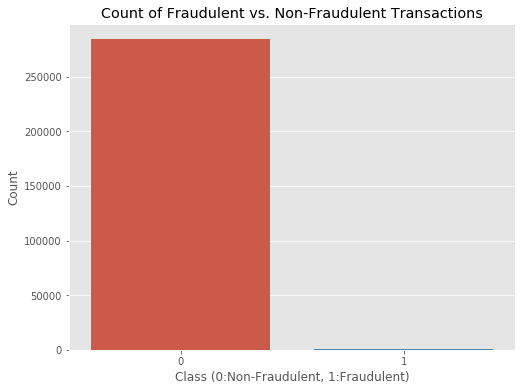

In [133]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [134]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

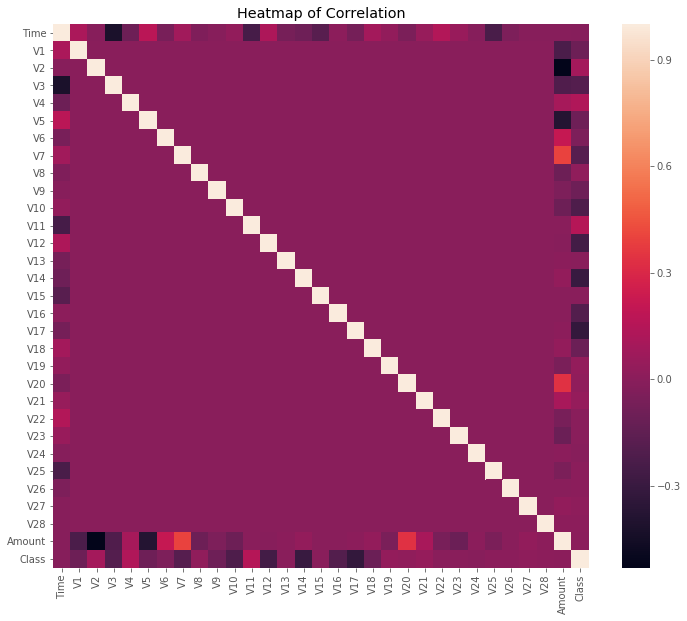

In [135]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [136]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling Amount and Time**

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [138]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [139]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
268105,163061.0,2.058,-0.962,-0.720,-0.697,-0.567,0.368,-0.932,0.106,-0.360,...,0.429,0.054,-0.675,0.214,-0.026,-0.041,44.95,0,-0.174,1.437
41995,40912.0,-2.304,-7.348,-2.226,0.222,-3.138,0.151,1.779,-0.617,-2.171,...,-1.869,0.093,-0.059,-0.269,-0.366,0.338,1988.00,0,7.595,-1.135
82499,59426.0,-3.818,2.191,-0.014,0.270,-0.094,1.463,-3.017,-7.694,-0.671,...,0.195,-0.015,-0.241,-0.695,-1.178,0.231,50.31,0,-0.152,-0.745
107576,70505.0,1.140,0.250,0.299,1.082,-0.041,-0.152,0.035,0.068,-0.311,...,-0.084,0.010,0.567,-0.300,0.022,0.008,11.61,0,-0.307,-0.512
197680,132127.0,2.040,-0.154,-1.085,0.197,0.072,-0.558,-0.005,-0.256,0.527,...,0.199,0.745,-0.124,0.520,-0.066,-0.049,20.00,0,-0.273,0.786


In [140]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [141]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256301, 31)
Test Shape: (28506, 31)


In [142]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [143]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 440 fraudulent transactions in the train data.


In [144]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [145]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
39149,-2.233,0.652,-0.115,-1.760,-2.436,-1.046,-1.272,1.319,-3.113,0.321,...,-0.461,0.134,0.356,-0.083,-0.402,-0.678,-0.296,0,-0.117,-1.122
159326,2.068,0.194,-1.661,0.432,0.422,-0.913,0.223,-0.271,0.412,-0.394,...,-0.889,0.343,0.627,-0.252,0.165,-0.059,-0.028,0,-0.342,0.595
197022,-0.595,0.740,-1.021,-0.292,1.480,-1.300,1.162,-0.319,-0.746,-0.283,...,0.905,-0.427,0.777,-0.292,0.220,-0.181,-0.217,0,-0.311,0.984
111798,-2.281,0.976,1.281,-0.477,-0.955,-0.708,0.236,0.258,0.405,0.025,...,-0.394,-0.201,0.392,0.283,0.203,-0.555,0.285,0,-0.033,-0.370
14167,0.996,0.329,-0.125,2.384,0.298,-0.297,0.593,-0.135,-1.280,0.860,...,-0.083,-0.254,-0.002,0.698,0.061,-0.066,0.015,0,0.102,-1.423


In [146]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [147]:
subsample = pd.concat([selected, fraud])
len(subsample)

880

In [148]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.524,-1.215,-0.238,1.328,-0.854,0.750,-0.895,0.302,1.630,0.065,...,0.522,-0.040,0.039,-0.325,-0.600,0.039,0.021,0,5.883e-01,0.522
1,2.118,-0.969,-2.528,-1.674,1.625,3.410,-1.527,0.941,-0.096,0.097,...,0.660,0.140,0.604,-0.113,-0.068,0.048,-0.017,0,-2.653e-01,1.204
2,-8.427,6.242,-9.946,8.200,-8.213,-2.522,-11.643,5.340,-7.051,-12.265,...,0.693,0.020,0.500,0.468,0.483,1.196,0.198,1,-4.782e-04,-1.129
3,2.039,0.528,-2.386,0.778,0.495,-1.745,0.313,-0.345,0.616,-1.186,...,0.450,-0.032,-0.247,0.219,-0.095,0.019,0.006,0,-3.492e-01,0.970
4,-13.681,6.990,-13.770,8.695,-11.427,-2.920,-14.595,8.623,-8.091,-12.781,...,0.498,-0.509,0.733,0.281,0.280,-1.407,-0.664,1,-3.502e-01,-1.127
5,-26.458,16.497,-30.177,8.904,-17.893,-1.228,-31.197,-11.439,-9.463,-22.187,...,3.461,0.897,0.255,-0.738,-0.967,-7.263,-1.325,1,-3.492e-01,-0.010
6,-2.831,0.886,1.200,2.861,0.322,0.290,1.768,-2.451,0.070,3.245,...,0.335,0.172,0.624,-0.527,-0.079,-2.532,0.311,1,6.581e-02,-1.347
7,-0.968,0.461,2.095,-0.269,-0.327,0.285,1.203,-0.133,1.225,-0.981,...,-0.645,0.157,-0.107,0.324,-0.532,0.063,-0.091,0,3.814e-01,0.227
8,0.987,-0.994,1.082,0.777,-1.482,0.239,-0.935,0.235,-0.178,0.657,...,-0.568,0.023,-0.011,0.103,-0.375,0.076,0.059,0,1.785e-01,-0.271
9,-3.240,2.978,-4.162,3.869,-3.645,-0.126,-4.745,-0.065,-2.168,-4.758,...,0.232,-0.036,0.043,-0.438,-0.126,0.421,0.003,1,3.357e-01,-1.120


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

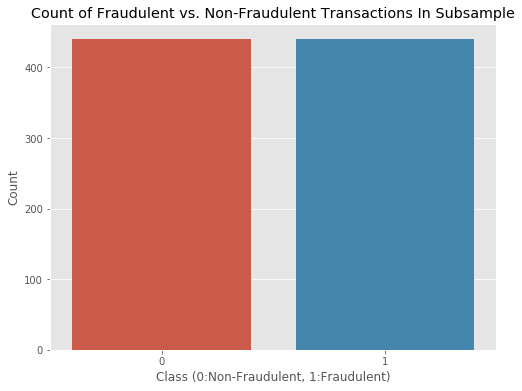

In [149]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [150]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.438
V2,0.489
V3,-0.569
V4,0.705
V5,-0.377
V6,-0.399
V7,-0.474
V8,0.057
V9,-0.560
V10,-0.631


In [151]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.569
V9,-0.560
V10,-0.631
V12,-0.683
V14,-0.753
V16,-0.607
V17,-0.568


In [152]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.705
V11,0.688
Class,1.000


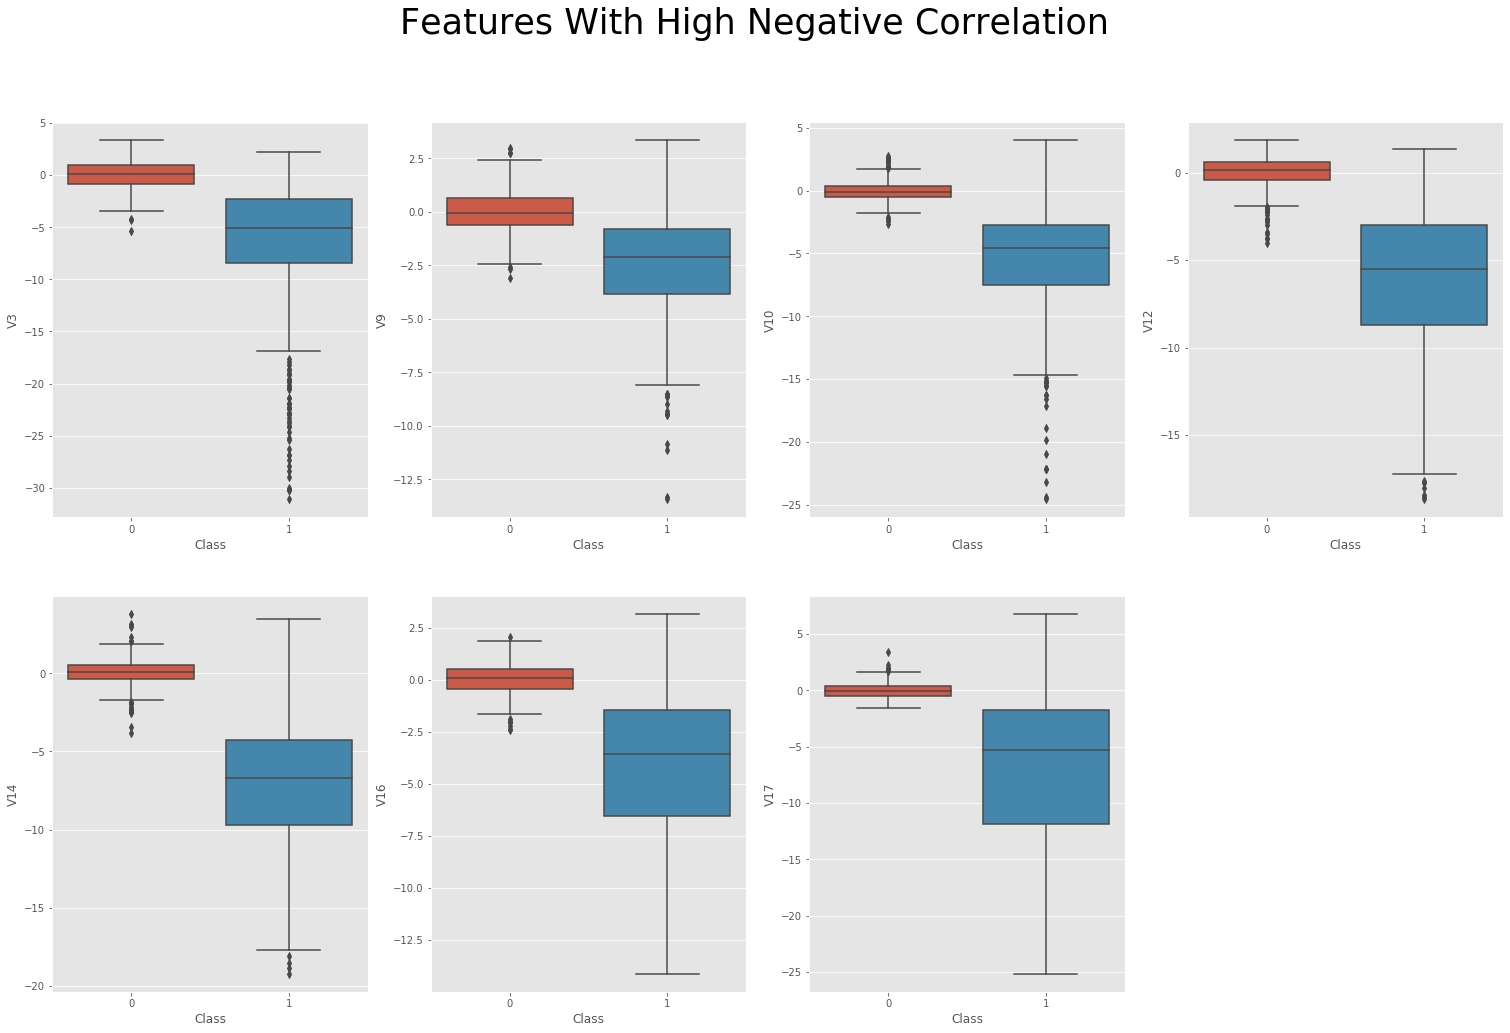

In [153]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

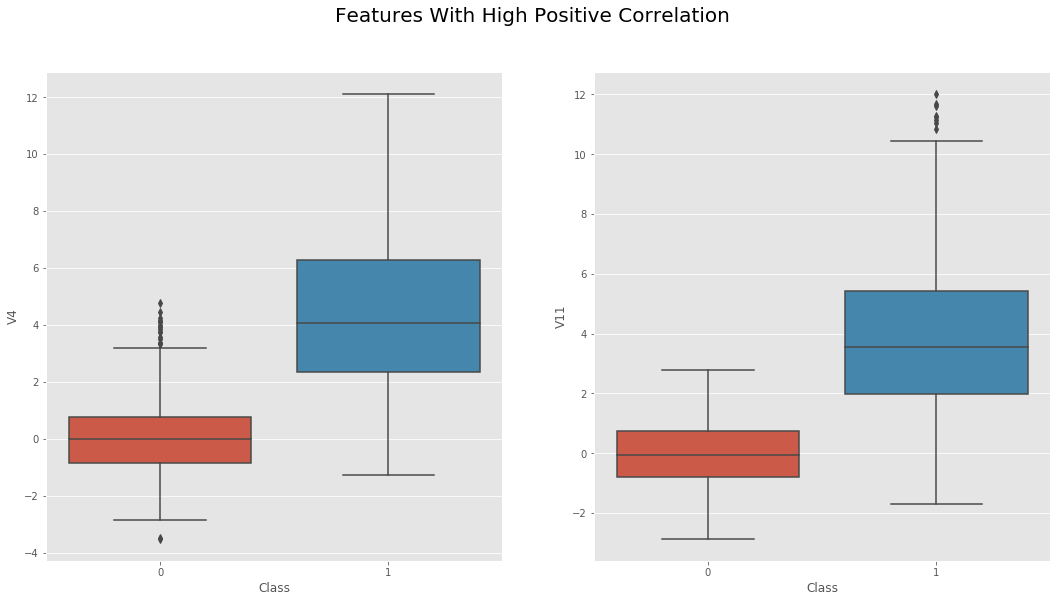

In [154]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [155]:
#Box plots provide us with a good intuition of whether we need to worry about outliers as all transactions outside of 1.5 times the IQR (Inter-Quartile Range) are usually 
#considered to be outliers. However, removing all transactions outside of 1.5 times the IQR would dramatically decrease our training data size, which is not very large, to begin with. 
#Thus, I decided to only focus on extreme outliers outside of 2.5 times the IQR.

#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [156]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 880 transactions by 253 transactions to 627 transactions.


**Dimensionality Reduction**

In [157]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [158]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

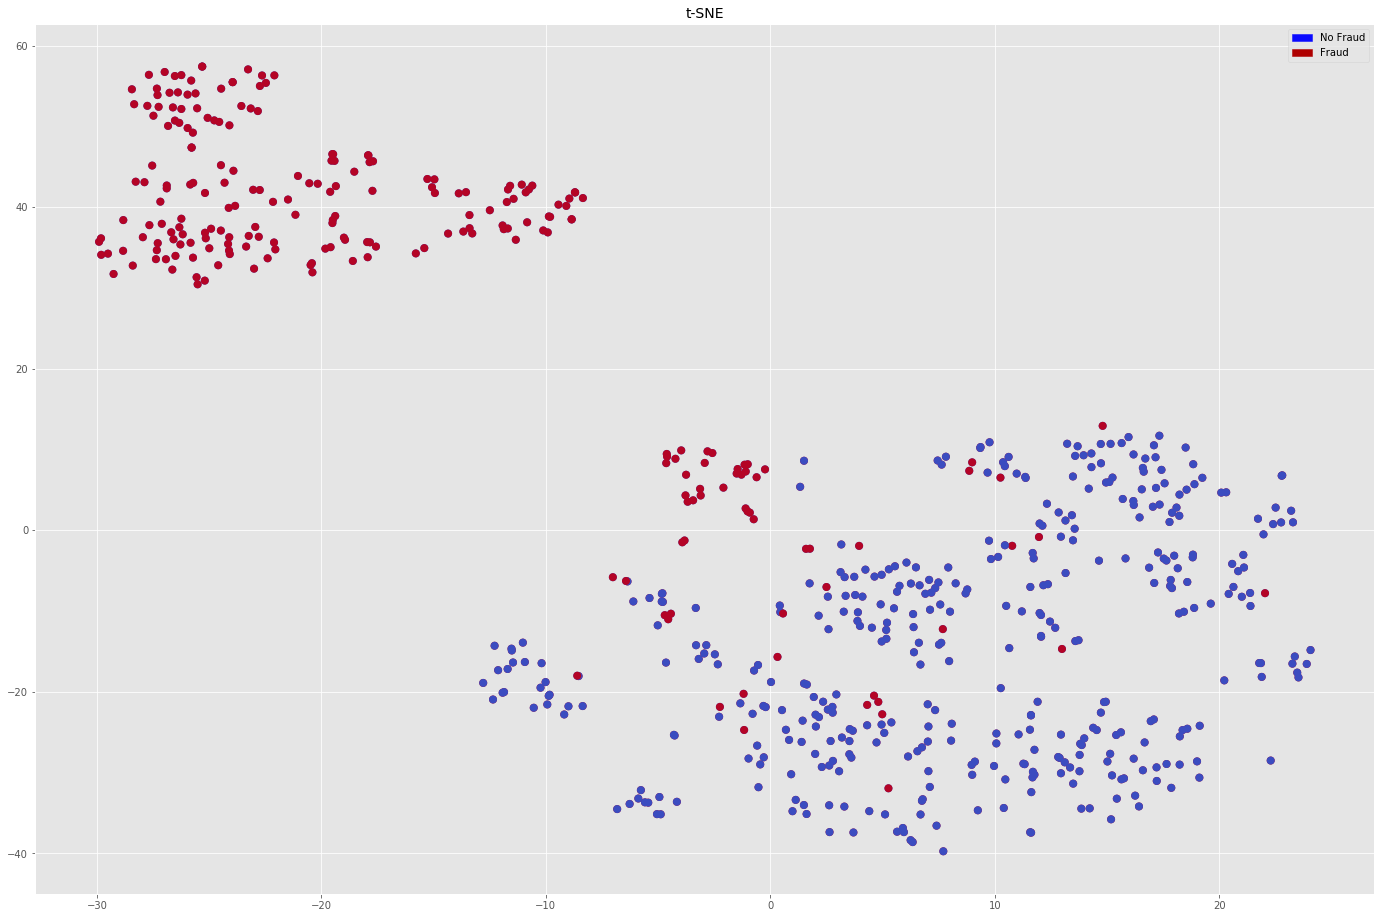

In [159]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


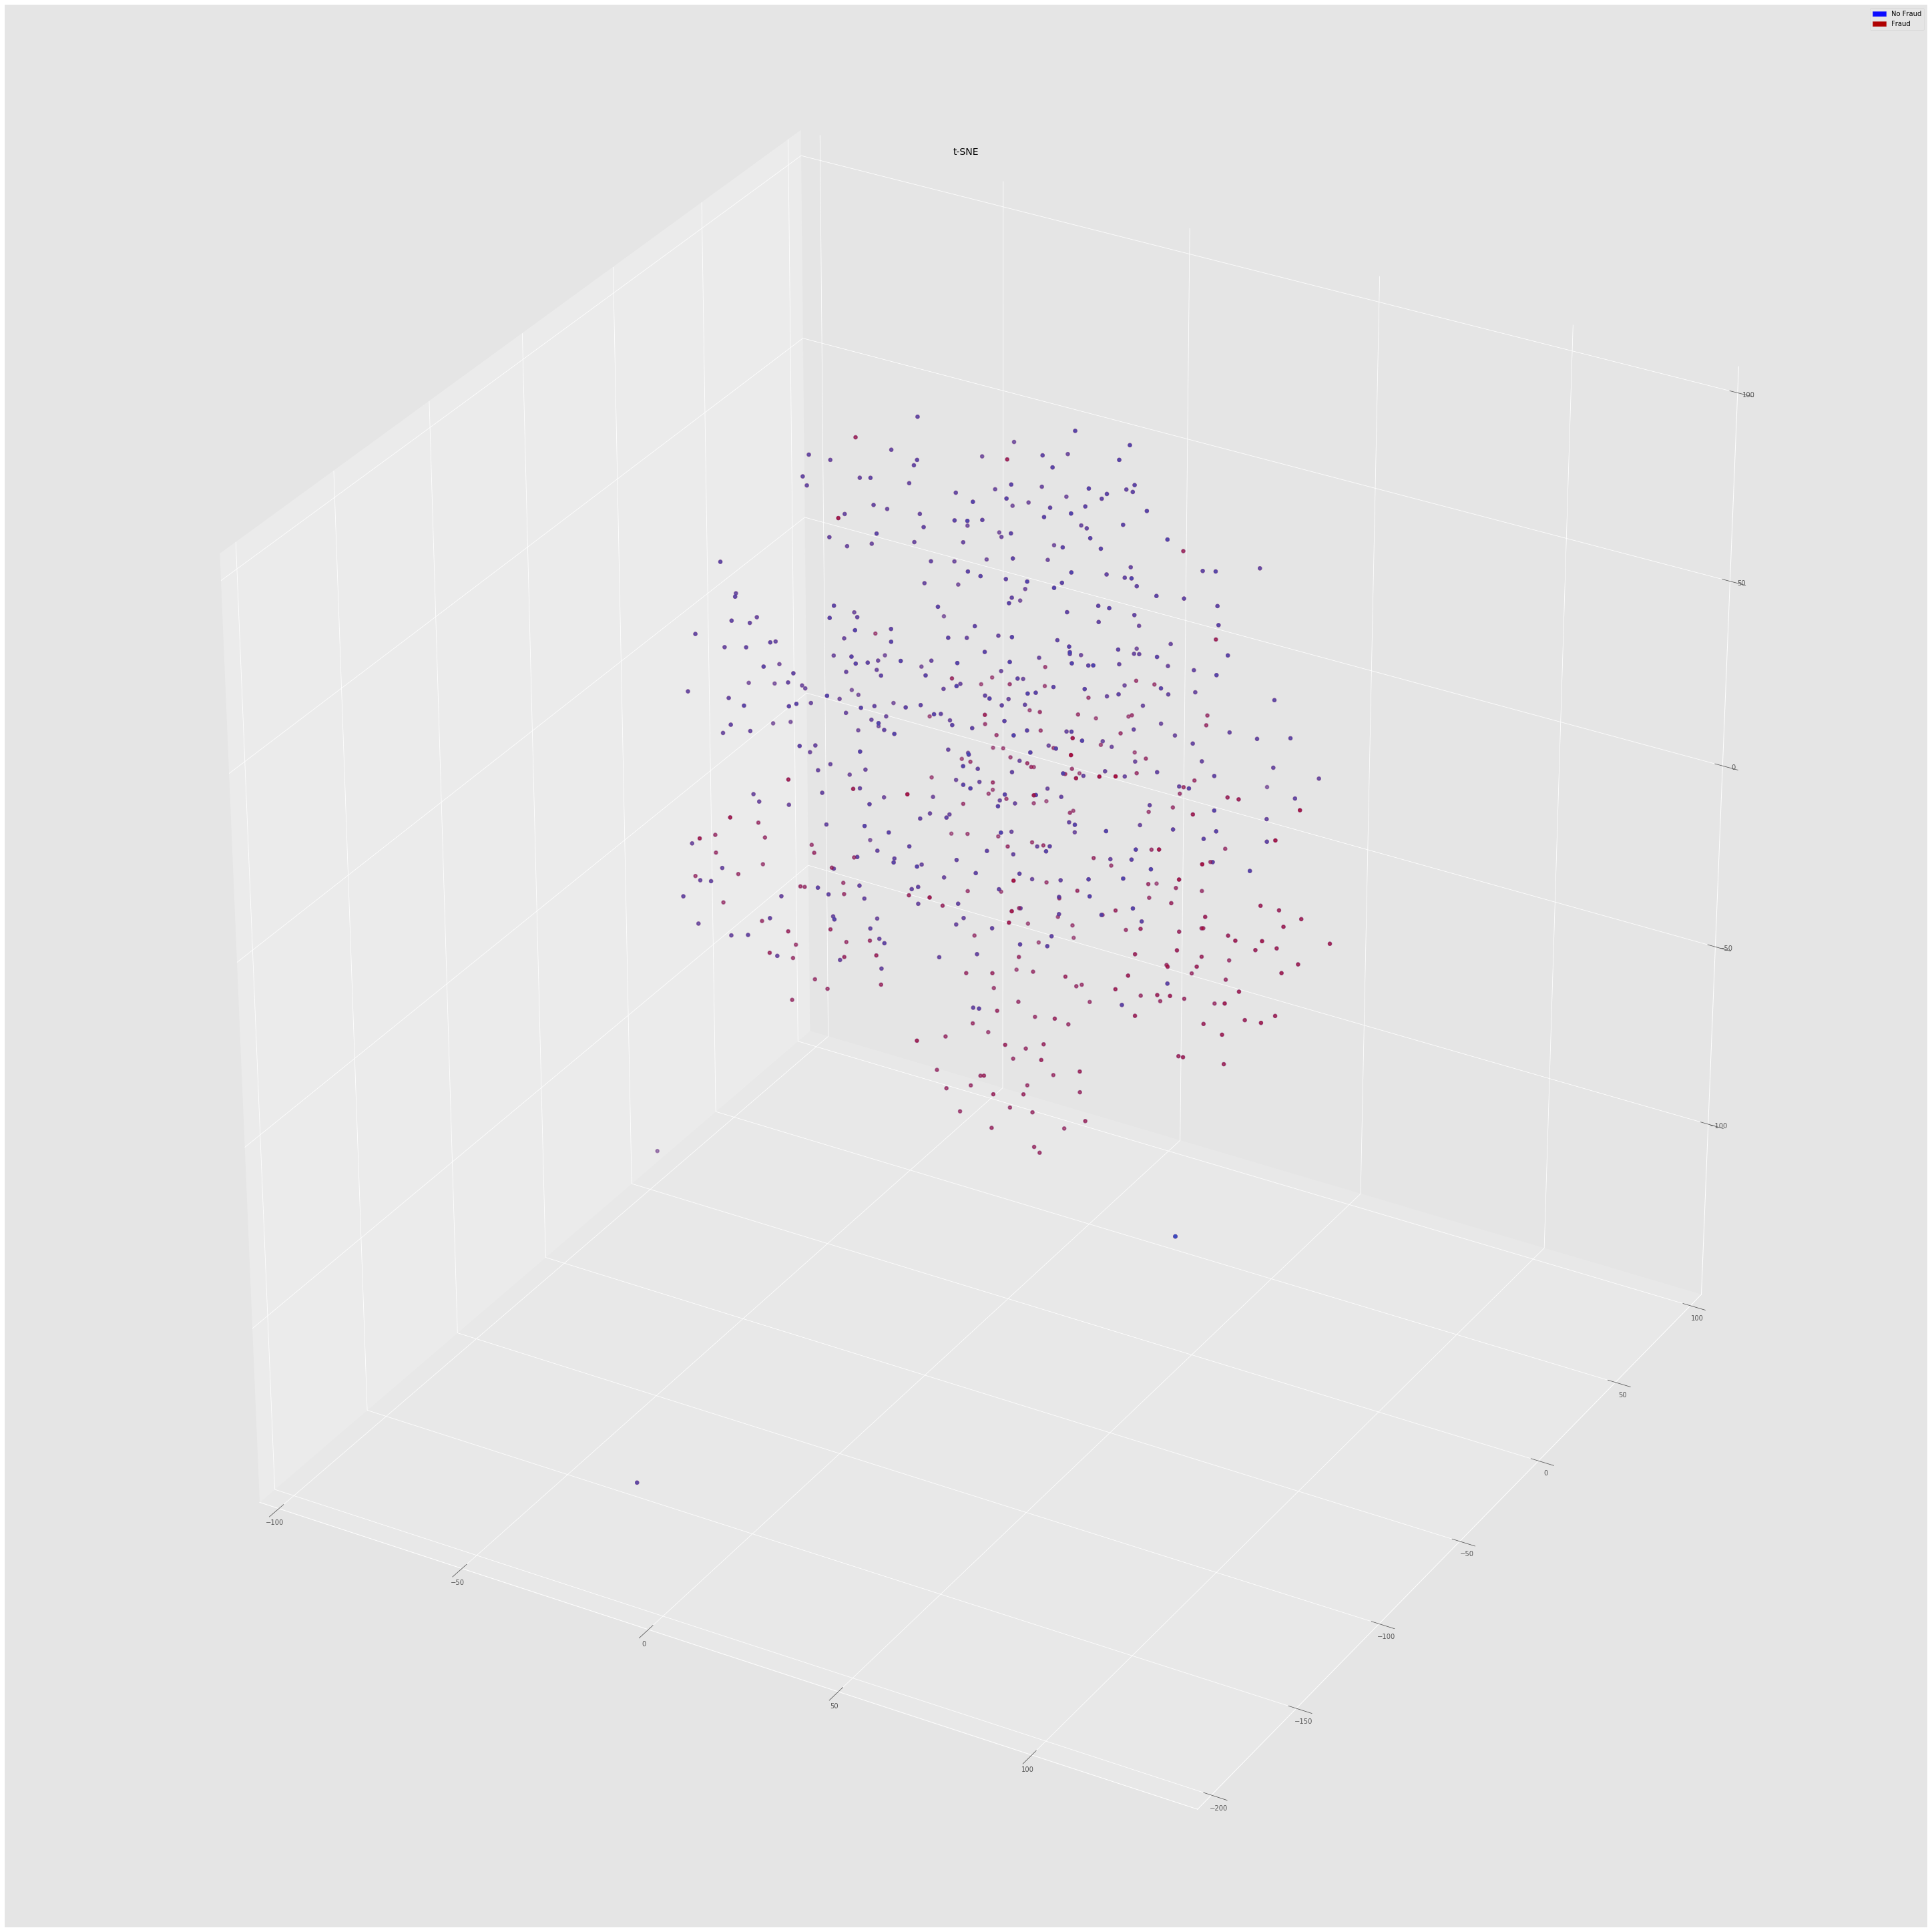

In [189]:
#from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

X = df2.drop('Class', axis=1)
y = df2['Class']

#t-SNE
X_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(X.values)

# t-SNE scatter plot
#import matplotlib.patches as mpatches

#f, ax = plt.subplots(figsize=(24,16))



blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

fig = plt.figure()
plt.rcParams['figure.figsize'] = (60, 40)
ax = Axes3D(fig)


ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], X_reduced_tsne[:,2], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], X_reduced_tsne[:,2], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [160]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [161]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [163]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (501, 30) (126, 30) 

Y_shapes:
 Y_train: Y_validation:
 (501,) (126,)


In [164]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [165]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.978392 (0.024741)
LDA: 0.973125 (0.025058)
KNN: 0.959256 (0.032919)
CART: 0.915087 (0.048203)
SVM: 0.976640 (0.020455)
XGB: 0.974702 (0.030583)
RF: 0.974413 (0.025489)


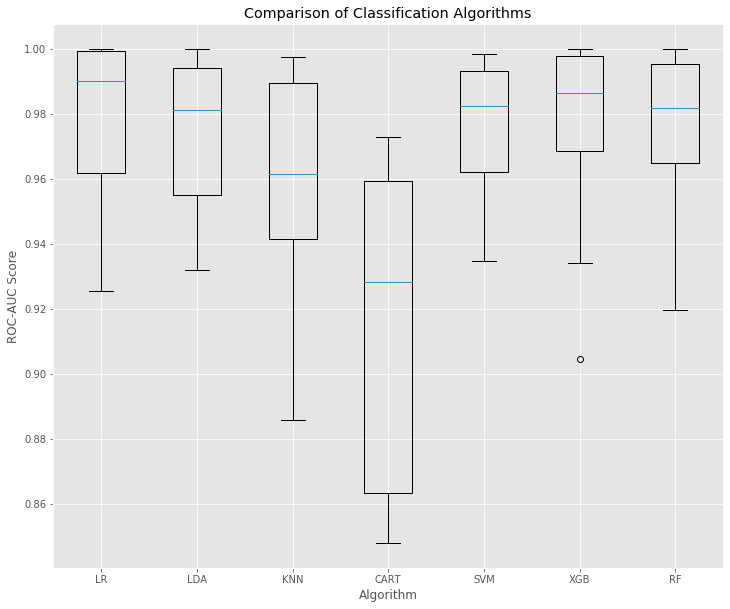

In [166]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [178]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [179]:
#pasar a mano .dot to .png

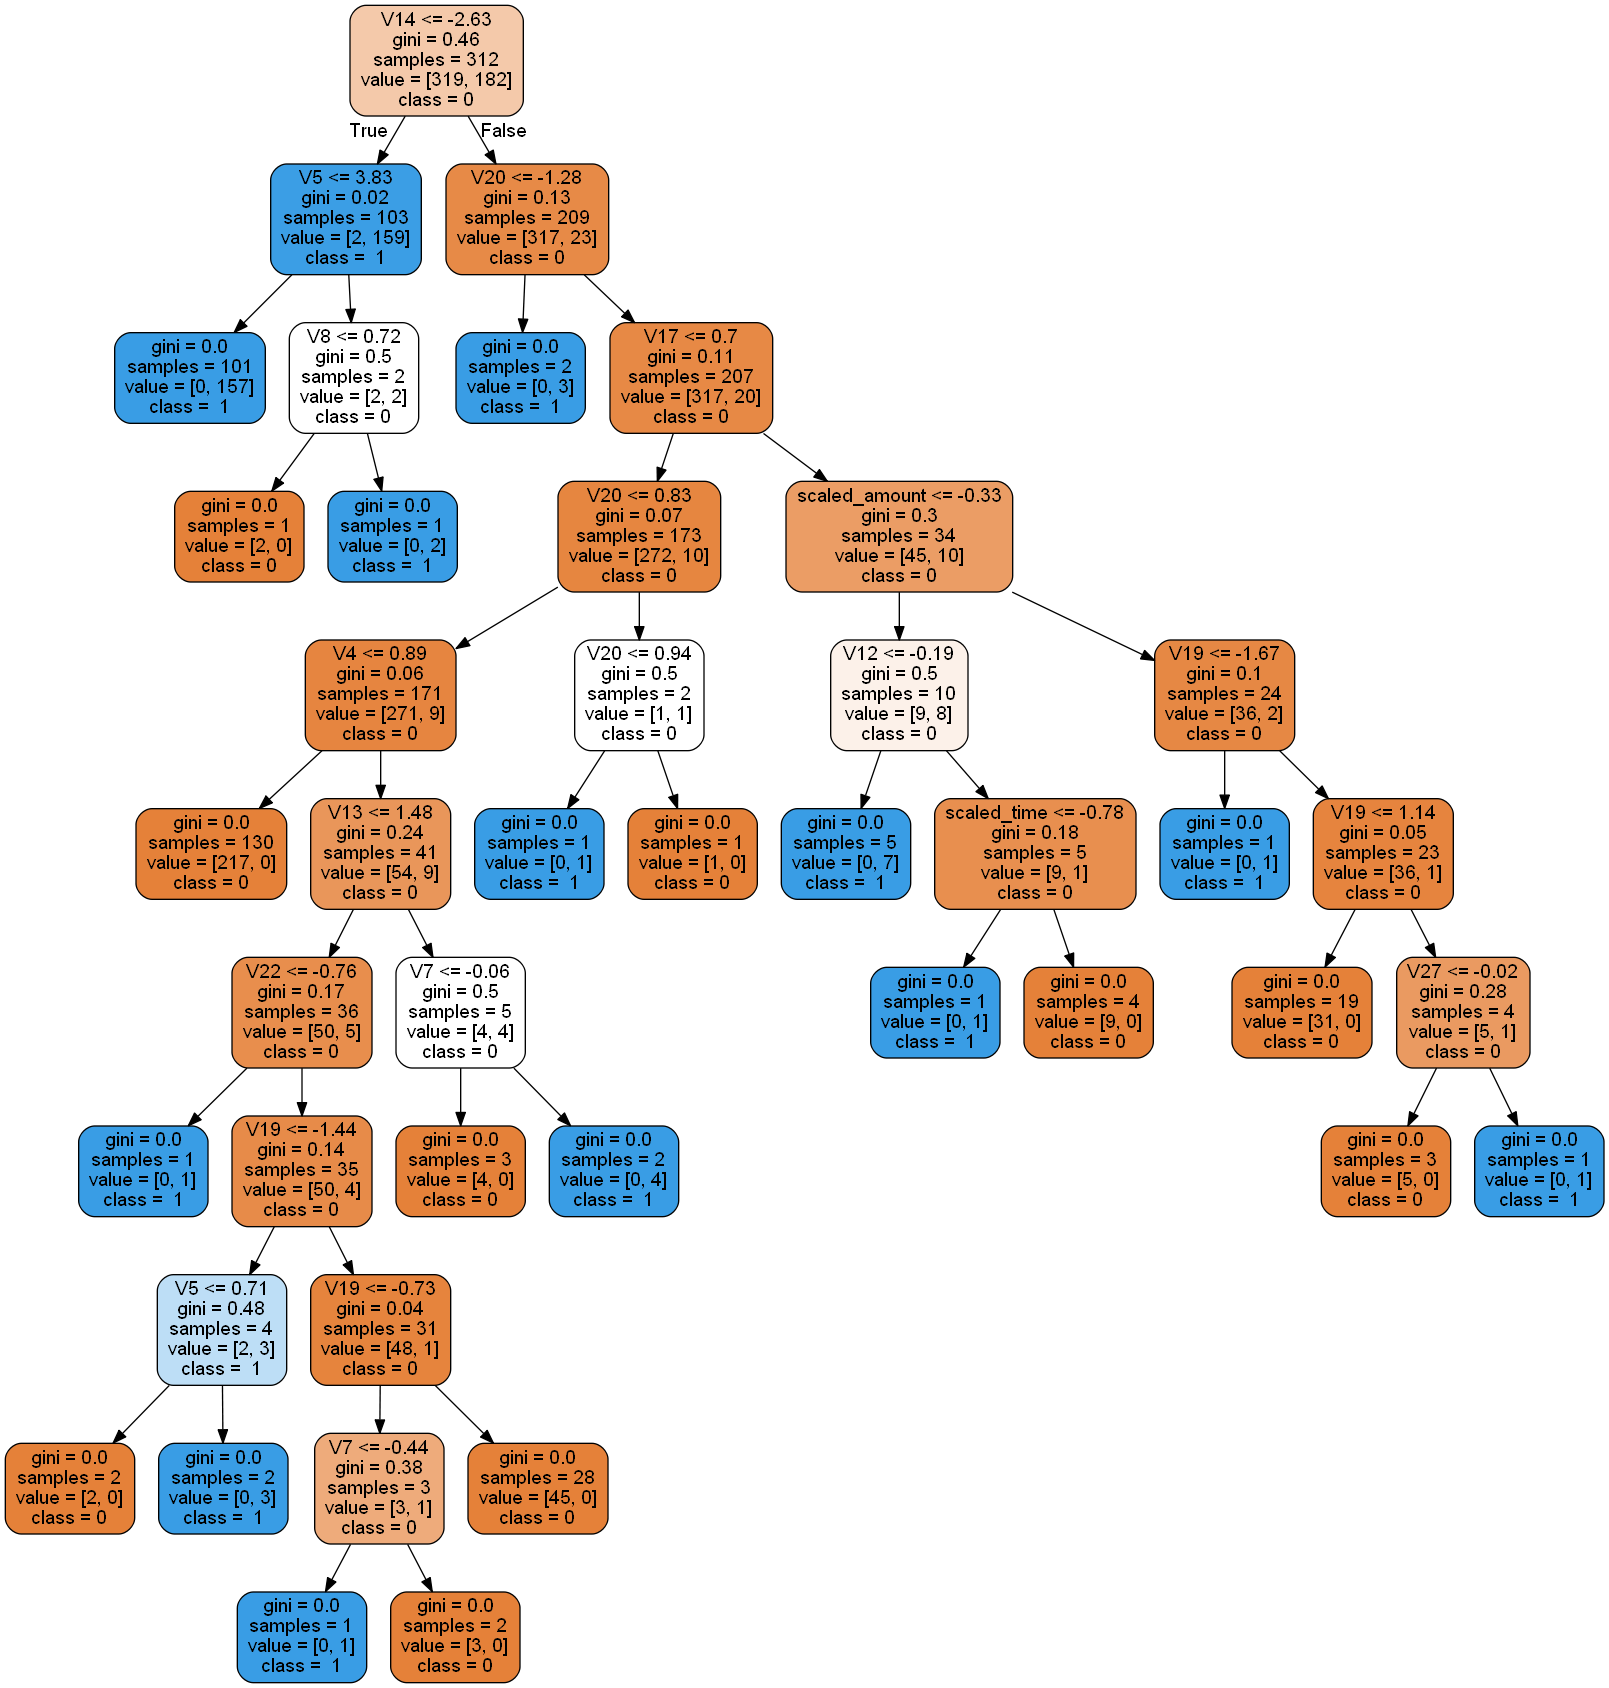

In [180]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')